In [1]:
'''
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

'''

'\n1) Extract reviews of any product from ecommerce website like amazon\n2) Perform emotion mining\n\n'

In [2]:
import pandas as pd
import string
import numpy as np
import spacy 
from bs4 import BeautifulSoup as bs
import requests

from nltk.tokenize import word_tokenize
import nltk

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 84A1-6D3A

 Directory of C:\Users\hp\Documents\EXCELR\DS_Assign_Ans

08/08/2023  09:08 PM    <DIR>          .
08/02/2023  05:51 PM    <DIR>          ..
08/08/2023  08:52 PM    <DIR>          .ipynb_checkpoints
07/26/2023  05:55 PM           783,051 50_startups data-MLR.ipynb
07/26/2023  12:10 PM             2,438 50_Startups.csv
08/02/2023  02:05 PM            30,582 Afinn.csv
07/28/2023  07:07 PM            81,413 Airlines_DBSCAN.ipynb
07/28/2023  07:12 PM           159,209 Airlines_Hierarchical_clustering.ipynb
07/28/2023  07:09 PM           145,996 Airlines_Kmeans.ipynb
08/01/2023  03:25 PM           164,575 apriori algorithm_Book.ipynb
08/01/2023  03:29 PM           182,205 apriori algorithm-my_movies.ipynb
08/02/2023  10:55 AM               247 Assignment.txt
07/26/2023  06:03 PM         4,610,348 bank-full.csv
04/26/2023  08:47 AM    <DIR>          Basic_Stats_L1
04/26/2023  08:57 AM    <DIR>          Basic_Stats_L2
07/29/

In [4]:
iPhone_12=[]

In [6]:
for i in range (1,41):
    op=[]
    url ="https://www.amazon.in/New-Apple-iPhone-12-64GB/product-reviews/B08L5T3S7T/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    iPhone_12= iPhone_12+op


In [7]:
iPhone_12

["\nI must say, it's an impressive smartphone that lives up to its reputation as a top-tier device. As of today's date, the iPhone 12 remains a fantastic choice, offering great value for its price.Design:The iPhone 12 boasts a refreshed design that sets it apart from other smartphones in the market. With its flat edges and straight lines reminiscent of the iconic iPhone 5, the device exudes elegance and sophistication. The Ceramic Shield display protection ensures added durability, providing peace of mind against accidental drops or scratches. The phone's slim and lightweight build, along with its ergonomic design, makes it a pleasure to hold and use. Apple's attention to detail and build quality shine through, making it one of the best-looking smartphones available.Performance:The iPhone 12 delivers solid and nippy performance, whether browsing the web, playing games, or running multiple applications simultaneously. With Apple's powerful A14 Bionic chip, the device handles tasks with 

In [8]:
iPhone_12_reviews= ' '.join(iPhone_12)

In [9]:
# Remove Punctuations 
no_punc_text=iPhone_12_reviews.translate(str.maketrans('','',string.punctuation))
no_punc_text

'\nI must say its an impressive smartphone that lives up to its reputation as a toptier device As of todays date the iPhone 12 remains a fantastic choice offering great value for its priceDesignThe iPhone 12 boasts a refreshed design that sets it apart from other smartphones in the market With its flat edges and straight lines reminiscent of the iconic iPhone 5 the device exudes elegance and sophistication The Ceramic Shield display protection ensures added durability providing peace of mind against accidental drops or scratches The phones slim and lightweight build along with its ergonomic design makes it a pleasure to hold and use Apples attention to detail and build quality shine through making it one of the bestlooking smartphones availablePerformanceThe iPhone 12 delivers solid and nippy performance whether browsing the web playing games or running multiple applications simultaneously With Apples powerful A14 Bionic chip the device handles tasks with ease and ensures smooth perfor

In [10]:
import re

In [11]:
no_url=re.sub(r'http\S+', '', no_punc_text)
no_url

'\nI must say its an impressive smartphone that lives up to its reputation as a toptier device As of todays date the iPhone 12 remains a fantastic choice offering great value for its priceDesignThe iPhone 12 boasts a refreshed design that sets it apart from other smartphones in the market With its flat edges and straight lines reminiscent of the iconic iPhone 5 the device exudes elegance and sophistication The Ceramic Shield display protection ensures added durability providing peace of mind against accidental drops or scratches The phones slim and lightweight build along with its ergonomic design makes it a pleasure to hold and use Apples attention to detail and build quality shine through making it one of the bestlooking smartphones availablePerformanceThe iPhone 12 delivers solid and nippy performance whether browsing the web playing games or running multiple applications simultaneously With Apples powerful A14 Bionic chip the device handles tasks with ease and ensures smooth perfor

In [12]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url)
print(text_tokens)

['I', 'must', 'say', 'its', 'an', 'impressive', 'smartphone', 'that', 'lives', 'up', 'to', 'its', 'reputation', 'as', 'a', 'toptier', 'device', 'As', 'of', 'todays', 'date', 'the', 'iPhone', '12', 'remains', 'a', 'fantastic', 'choice', 'offering', 'great', 'value', 'for', 'its', 'priceDesignThe', 'iPhone', '12', 'boasts', 'a', 'refreshed', 'design', 'that', 'sets', 'it', 'apart', 'from', 'other', 'smartphones', 'in', 'the', 'market', 'With', 'its', 'flat', 'edges', 'and', 'straight', 'lines', 'reminiscent', 'of', 'the', 'iconic', 'iPhone', '5', 'the', 'device', 'exudes', 'elegance', 'and', 'sophistication', 'The', 'Ceramic', 'Shield', 'display', 'protection', 'ensures', 'added', 'durability', 'providing', 'peace', 'of', 'mind', 'against', 'accidental', 'drops', 'or', 'scratches', 'The', 'phones', 'slim', 'and', 'lightweight', 'build', 'along', 'with', 'its', 'ergonomic', 'design', 'makes', 'it', 'a', 'pleasure', 'to', 'hold', 'and', 'use', 'Apples', 'attention', 'to', 'detail', 'and', 

In [13]:
len(text_tokens)

57744

In [14]:
#Remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

sw= ['\n','iOS','55k62k','A14','yeah','x60','12It','I','The','10','100','11ultra','12','1264','128','128gbthe','13','15','16','164','2015','2020','2022','2022btw','2023','20k','26','50','530','56','599','6000','64','649','80k','888','895','9pro','a15']
stop_words.extend(sw)

no_stop_tokens = [word for word in text_tokens if not word in stop_words]
print(no_stop_tokens)

['must', 'say', 'impressive', 'smartphone', 'lives', 'reputation', 'toptier', 'device', 'As', 'todays', 'date', 'iPhone', 'remains', 'fantastic', 'choice', 'offering', 'great', 'value', 'priceDesignThe', 'iPhone', 'boasts', 'refreshed', 'design', 'sets', 'apart', 'smartphones', 'market', 'With', 'flat', 'edges', 'straight', 'lines', 'reminiscent', 'iconic', 'iPhone', '5', 'device', 'exudes', 'elegance', 'sophistication', 'Ceramic', 'Shield', 'display', 'protection', 'ensures', 'added', 'durability', 'providing', 'peace', 'mind', 'accidental', 'drops', 'scratches', 'phones', 'slim', 'lightweight', 'build', 'along', 'ergonomic', 'design', 'makes', 'pleasure', 'hold', 'use', 'Apples', 'attention', 'detail', 'build', 'quality', 'shine', 'making', 'one', 'bestlooking', 'smartphones', 'availablePerformanceThe', 'iPhone', 'delivers', 'solid', 'nippy', 'performance', 'whether', 'browsing', 'web', 'playing', 'games', 'running', 'multiple', 'applications', 'simultaneously', 'With', 'Apples', 'po

In [15]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['must', 'say', 'impressive', 'smartphone', 'lives', 'reputation', 'toptier', 'device', 'as', 'todays', 'date', 'iphone', 'remains', 'fantastic', 'choice', 'offering', 'great', 'value', 'pricedesignthe', 'iphone', 'boasts', 'refreshed', 'design', 'sets', 'apart']


In [16]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
data1=nlp(' '.join(lower_words))
print(data1)

must say impressive smartphone lives reputation toptier device as todays date iphone remains fantastic choice offering great value pricedesignthe iphone boasts refreshed design sets apart smartphones market with flat edges straight lines reminiscent iconic iphone 5 device exudes elegance sophistication ceramic shield display protection ensures added durability providing peace mind accidental drops scratches phones slim lightweight build along ergonomic design makes pleasure hold use apples attention detail build quality shine making one bestlooking smartphones availableperformancethe iphone delivers solid nippy performance whether browsing web playing games running multiple applications simultaneously with apples powerful bionic chip device handles tasks ease ensures smooth performance across various applications functionscamerathe camera performance iphone reliable impressive pointandshoot capabilities along hdr video support allow capturing stunning photos videos various lighting con

In [17]:
lemmas=[token.lemma_ for token in data1]
print(lemmas)

['must', 'say', 'impressive', 'smartphone', 'live', 'reputation', 'toptier', 'device', 'as', 'today', 'date', 'iphone', 'remain', 'fantastic', 'choice', 'offer', 'great', 'value', 'pricedesignthe', 'iphone', 'boast', 'refresh', 'design', 'set', 'apart', 'smartphone', 'market', 'with', 'flat', 'edge', 'straight', 'line', 'reminiscent', 'iconic', 'iphone', '5', 'device', 'exude', 'elegance', 'sophistication', 'ceramic', 'shield', 'display', 'protection', 'ensure', 'add', 'durability', 'provide', 'peace', 'mind', 'accidental', 'drop', 'scratch', 'phone', 'slim', 'lightweight', 'build', 'along', 'ergonomic', 'design', 'make', 'pleasure', 'hold', 'use', 'apple', 'attention', 'detail', 'build', 'quality', 'shine', 'make', 'one', 'bestlooking', 'smartphone', 'availableperformancethe', 'iphone', 'deliver', 'solid', 'nippy', 'performance', 'whether', 'browse', 'web', 'playing', 'game', 'run', 'multiple', 'application', 'simultaneously', 'with', 'apple', 'powerful', 'bionic', 'chip', 'device', '

In [18]:
clean_data=' '.join(lemmas)
clean_data

"must say impressive smartphone live reputation toptier device as today date iphone remain fantastic choice offer great value pricedesignthe iphone boast refresh design set apart smartphone market with flat edge straight line reminiscent iconic iphone 5 device exude elegance sophistication ceramic shield display protection ensure add durability provide peace mind accidental drop scratch phone slim lightweight build along ergonomic design make pleasure hold use apple attention detail build quality shine make one bestlooking smartphone availableperformancethe iphone deliver solid nippy performance whether browse web playing game run multiple application simultaneously with apple powerful bionic chip device handle task ease ensure smooth performance across various application functionscamerathe camera performance iphone reliable impressive pointandshoot capability along hdr video support allow capturing stunning photo video various lighting condition while may feature iphone pro camera ip

### Feature Extraction
Using Bag of Words

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [20]:
print(vectorizer.vocabulary_)

{'must': 286, 'say': 377, 'impressive': 216, 'smartphone': 403, 'live': 259, 'reputation': 363, 'toptier': 448, 'device': 112, 'as': 33, 'today': 444, 'date': 101, 'iphone': 228, 'remain': 360, 'fantastic': 152, 'choice': 79, 'offer': 301, 'great': 183, 'value': 470, 'pricedesignthe': 334, 'boast': 54, 'refresh': 358, 'design': 110, 'set': 386, 'apart': 27, 'market': 268, 'with': 490, 'flat': 165, 'edge': 127, 'straight': 421, 'line': 257, 'reminiscent': 361, 'iconic': 210, 'exude': 147, 'elegance': 128, 'sophistication': 410, 'ceramic': 73, 'shield': 387, 'display': 114, 'protection': 339, 'ensure': 133, 'add': 12, 'durability': 123, 'provide': 340, 'peace': 316, 'mind': 273, 'accidental': 10, 'drop': 120, 'scratch': 378, 'phone': 319, 'slim': 398, 'lightweight': 255, 'build': 61, 'along': 18, 'ergonomic': 135, 'make': 265, 'pleasure': 325, 'hold': 202, 'use': 467, 'apple': 29, 'attention': 34, 'detail': 111, 'quality': 345, 'shine': 388, 'one': 303, 'bestlooking': 47, 'availableperfo

In [21]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['bit', 'black', 'bless', 'blue', 'boast', 'body', 'browse', 'btw', 'budget', 'budgetfriendly', 'bug', 'build', 'business', 'but', 'button', 'buy', 'call', 'cam', 'camera', 'capability', 'capturing', 'carrier', 'cash', 'ceramic', 'chance', 'change', 'change3', 'charge', 'chip', 'choice', 'clear', 'color', 'come', 'comes', 'comfortable', 'comment', 'compare', 'compelling', 'competition', 'complain', 'condition', 'connectivity', 'consider', 'convenient', 'could', 'couple', 'crisp', 'crystal', 'culprit', 'currently']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
print(X.toarray().shape)

(32904, 500)


#### bigrams and trigrams

In [23]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [24]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'android', 'apart', 'apple', 'battery', 'bionic', 'build', 'but', 'camera', 'change', 'charge', 'chip', 'definitely', 'deliver', 'design', 'detail', 'device', 'difference', 'display', 'do', 'early', 'else', 'ensure', 'even', 'every', 'excellent', 'expect', 'expensive', 'experience', 'fantastic', 'feature', 'feel', 'fingerprint', 'flagship', 'front', 'game', 'gb', 'get', 'go', 'good', 'great', 'have', 'hold', 'if', 'impressive', 'in', 'india', 'internal', 'iphone', 'it', 'its', 'less', 'life', 'like', 'look', 'lot', 'make', 'miss', 'much', 'must', 'no', 'not', 'notch', 'offer', 'one', 'performance', 'phone', 'photo', 'powerful', 'price', 'primary', 'pro', 'produce', 'product', 'purchase', 'quality', 'really', 'remain', 'review', 'say', 'screen', 'sensor', 'signal', 'smartphone', 'smooth', 'spend', 'spot', 'still', 'support', 'take', 'thing', 'time', 'update', 'use', 'user', 'value', 'video', 'wait', 'want', 'well']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 

### TFidf vectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)

print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['1264', '128', '128gbthe', '2022btw', '2022hope', '6000', '64', '649', '888snapdragon', 'about', 'accidental', 'across', 'add', 'advancement', 'advantage', 'advertise', 'alert', 'allow', 'along', 'already', 'also', 'amazon', 'and', 'android', 'another', 'anything', 'anyway', 'apart', 'app', 'apple', 'application', 'around', 'article', 'as', 'attention', 'aug2021', 'avail', 'available', 'availableperformancethe', 'away', 'back', 'bass', 'battery', 'batteryi', 'be', 'beast', 'beautiful', 'bestlooking', 'big', 'bionic', 'bit', 'black', 'bless', 'blue', 'boast', 'body', 'browse', 'btw', 'budget', 'budgetfriendly', 'bug', 'build', 'business', 'but', 'button', 'buy', 'call', 'cam', 'camera', 'capability', 'capturing', 'carrier', 'cash', 'ceramic', 'chance', 'change', 'change3', 'charge', 'chip', 'choice', 'clear', 'color', 'come', 'comes', 'comfortable', 'comment', 'compare', 'compelling', 'competition', 'complain', 'condition', 'connectivity', 'consider', 'convenient', 'could', 'couple', '

### Generate wordcloud

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

#function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

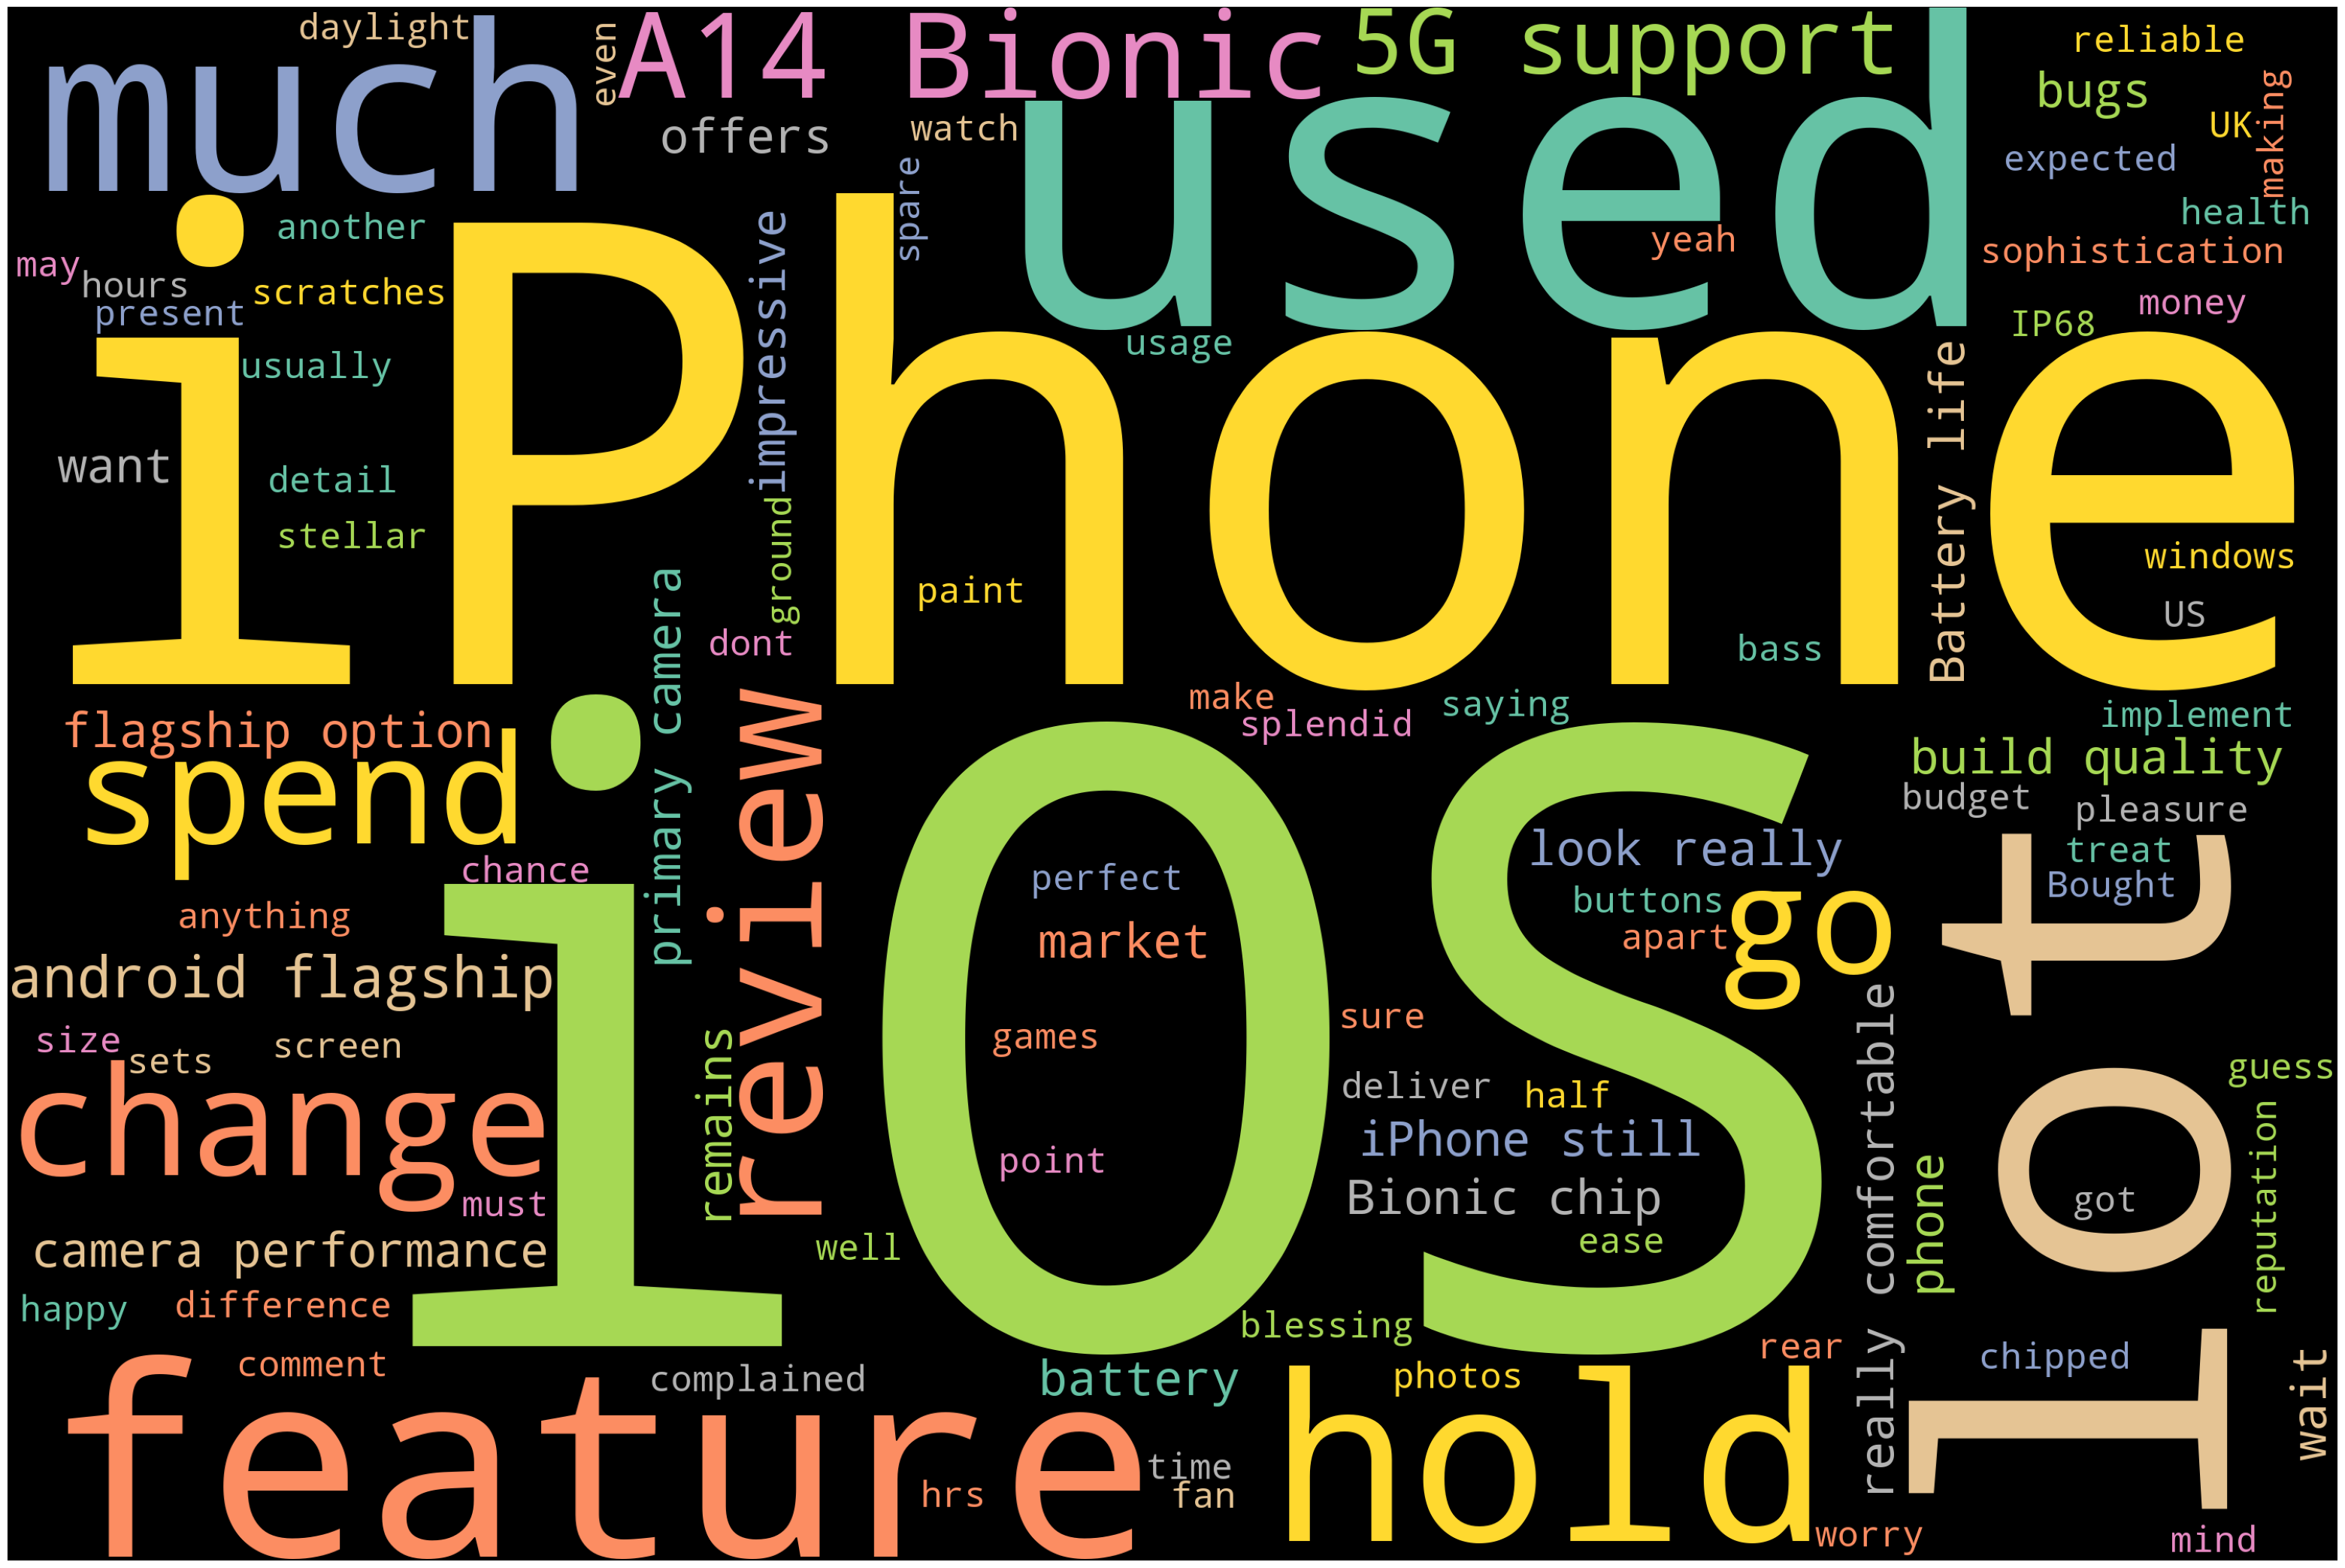

In [27]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(iPhone_12_reviews)
# Plot
plot_cloud(wordcloud)

In [28]:
with open("C:\\Users\\hp\\Documents\\EXCELR\\DS_Assign_Ans\\positive-words.txt","r") as f:
    positive=f.read().split("\n")

In [29]:
positive=positive[25:]

In [30]:
review_positive=' '.join([word for word in no_stop_tokens if word in positive])

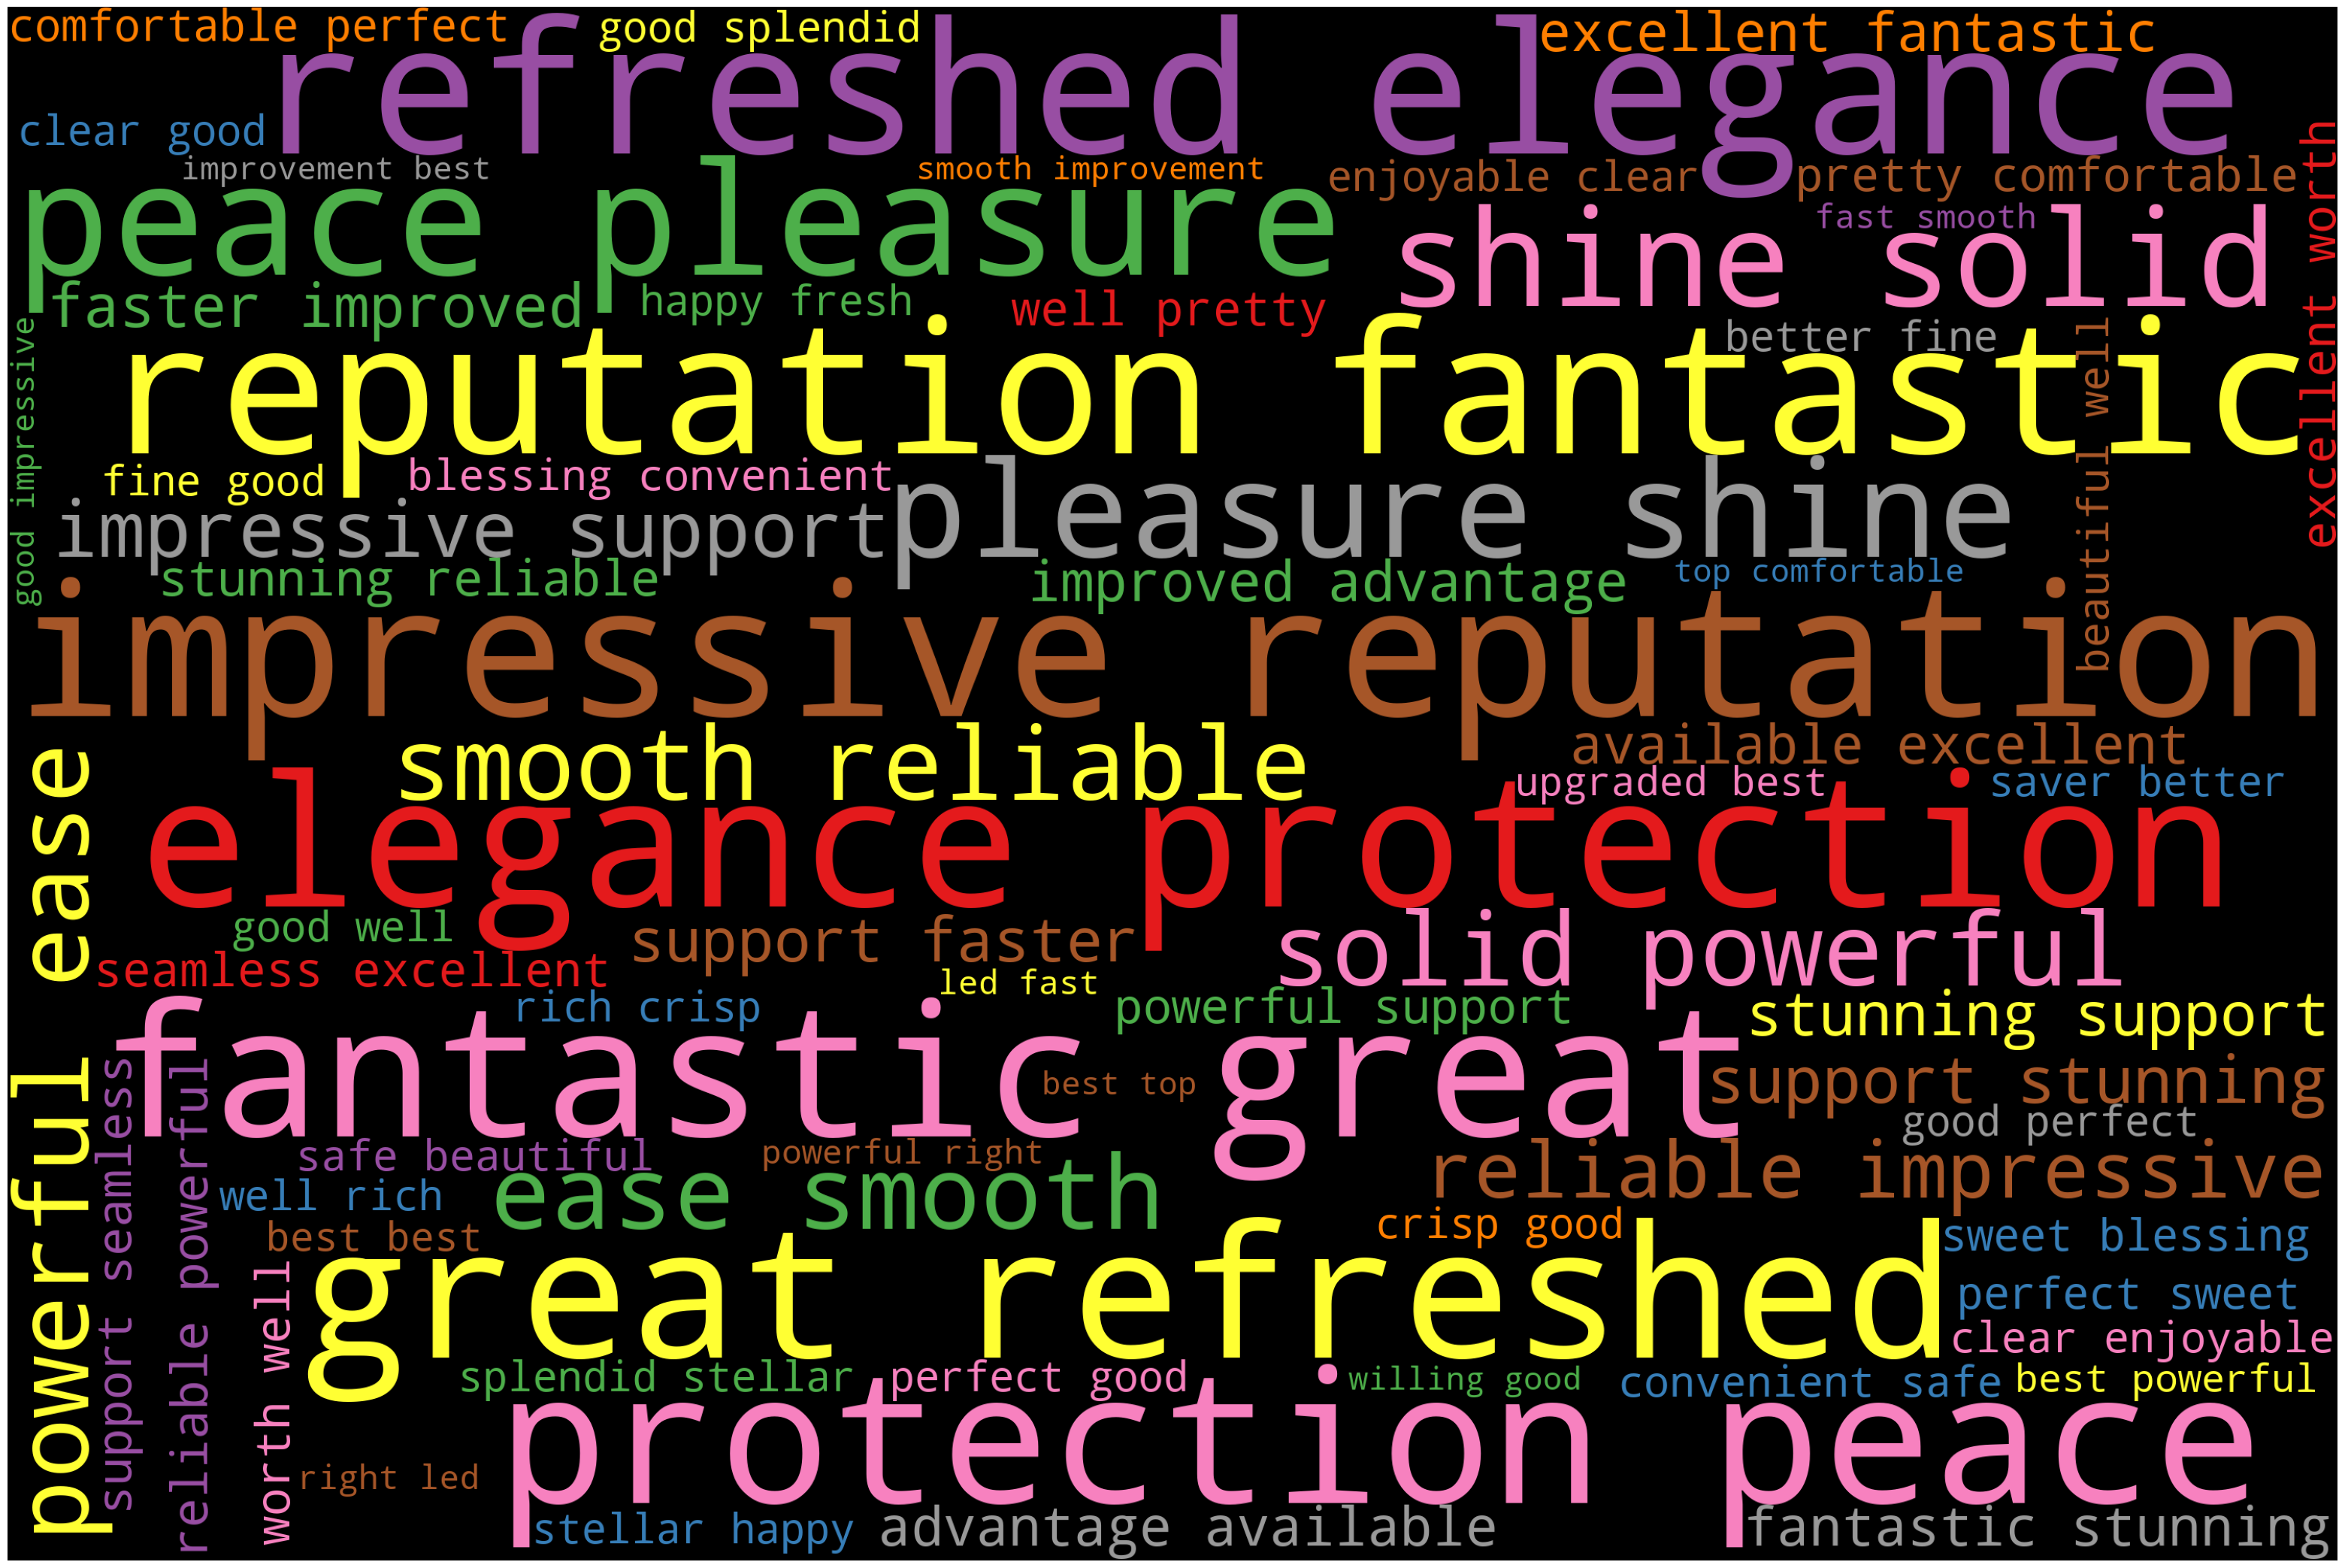

In [31]:
#positive word

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,colormap='Set1',stopwords=STOPWORDS).generate(review_positive)
plot_cloud(wordcloud)

In [32]:
with open("C:\\Users\\hp\\Documents\\EXCELR\\DS_Assign_Ans\\negative-words.txt") as f:
    negative=f.read().split("\n")

In [33]:
negative = negative[25:]

In [34]:
review_negative=' '.join([word for word in no_stop_tokens if word in negative])

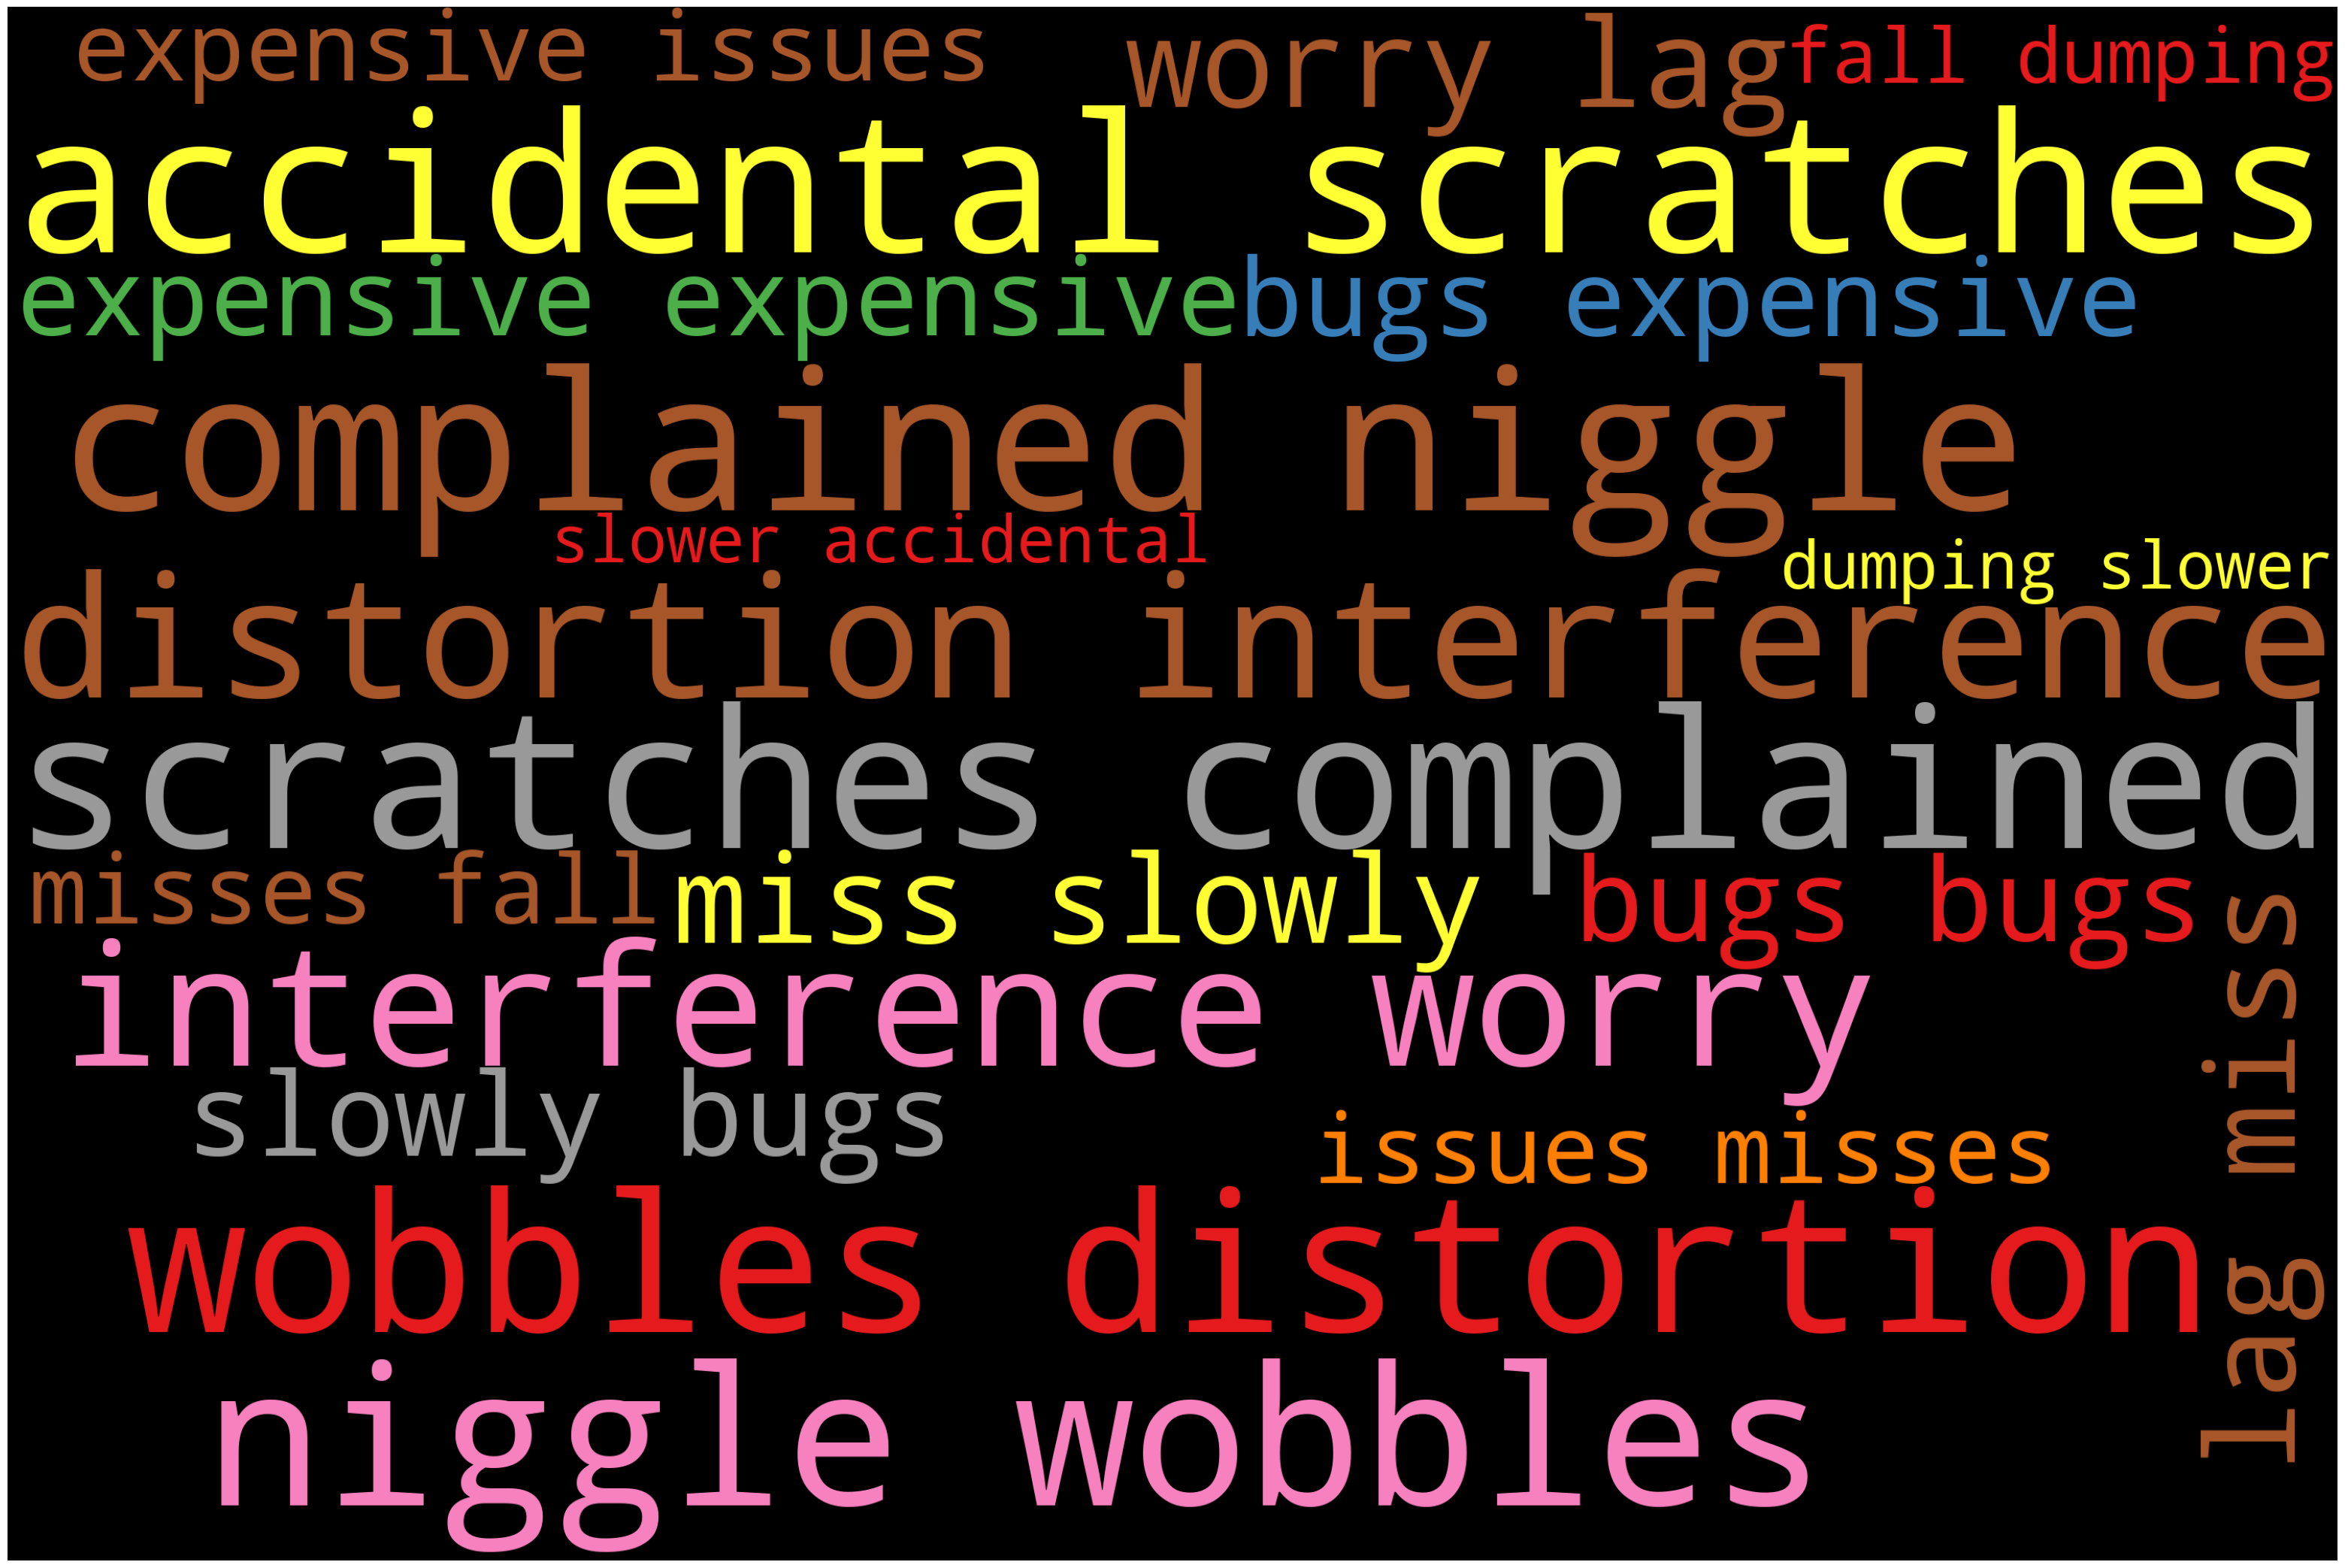

In [35]:
#negative word

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,colormap='Set1',stopwords=STOPWORDS).generate(review_negative)
plot_cloud(wordcloud)